# Numerical Integration

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [3]:
def middle(f, a, b, n):

    x = np.linspace(a, b, n)
    f = np.vectorize(f)
    h = (b-a)/(n-1)
    I = h*np.sum(f((x[:-1]+x[1:])/2))

    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checker
checker.exact_checker(middle)

Test 1  |::|  err= 1.0280911905136136e-05   |::|   time= 0.00897836685180664 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0007980231737017007   |::|   time= 0.0010135173797607422 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 2.5233251172984694e-06   |::|   time= 0.0009706020355224609 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

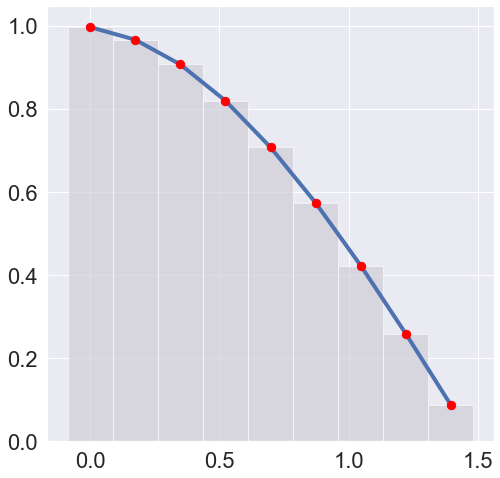

In [5]:
f=lambda x: np.cos(x)
a=0
b=np.pi/2
n=10

x = np.linspace(a, b, n)
f = np.vectorize(f)
h = (b-a)/(n-1)
mp = f((x[:-1]+x[1:])/2)

plt.figure(figsize=(8,8))
plt.plot(x[:-1], mp, 'b-')
plt.bar(x[:-1], mp, h, color='#CBC7D1', alpha=0.6)
plt.scatter(x[:-1], mp, s=70, c='red', zorder=2)
plt.show()

### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [6]:
def trapezoidal(f, a, b, n):
    
    x = np.linspace(a, b, n)
    f = np.vectorize(f)
    h = (b-a)/(n-1)
    I = h*((f(a)+f(b))/2 + np.sum(f(x[1:-1])))

    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [7]:
checker.exact_checker(trapezoidal)

Test 1  |::|  err= 2.056176039255675e-05   |::|   time= 0.00098419189453125 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0014178308025147857   |::|   time= 0.0009965896606445312 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.802319914398723e-06   |::|   time= 0.0009970664978027344 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [8]:
def simpson(f, a, b, n):
    
    if n%2 == 0: n = n+1 # Correcting possible input of even n 
    x = np.linspace(a, b, n)
    f = np.vectorize(f)
    h = (b-a)/(n-1)
    I = (h/3)*np.sum(f(x[:-2:2]) + 4*f(x[1:-1:2]) + f(x[2::2]))
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [9]:
checker.exact_checker(simpson)

Test 1  |::|  err= 3.3823588374559677e-10   |::|   time= 0.0009980201721191406 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.0010287667022845781   |::|   time= 0.0 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 8.022237341087646e-08   |::|   time= 0.0009970664978027344 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{24n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

In [10]:
def u_bound(f, a, b, n):

    x = np.linspace(a, b, n)
    f = np.vectorize(f)
    u_bound_mp = ((b-a)**3)/(24*(n**2))*(np.max(f(x))**2)
    u_bound_trap = ((b-a)**3)/(12*(n**2))*(np.max(f(x))**2)
    u_bound_simp = ((b-a)**5)/(180*(n**4))*(np.max(f(x))**4)

    return u_bound_mp, u_bound_trap, u_bound_simp

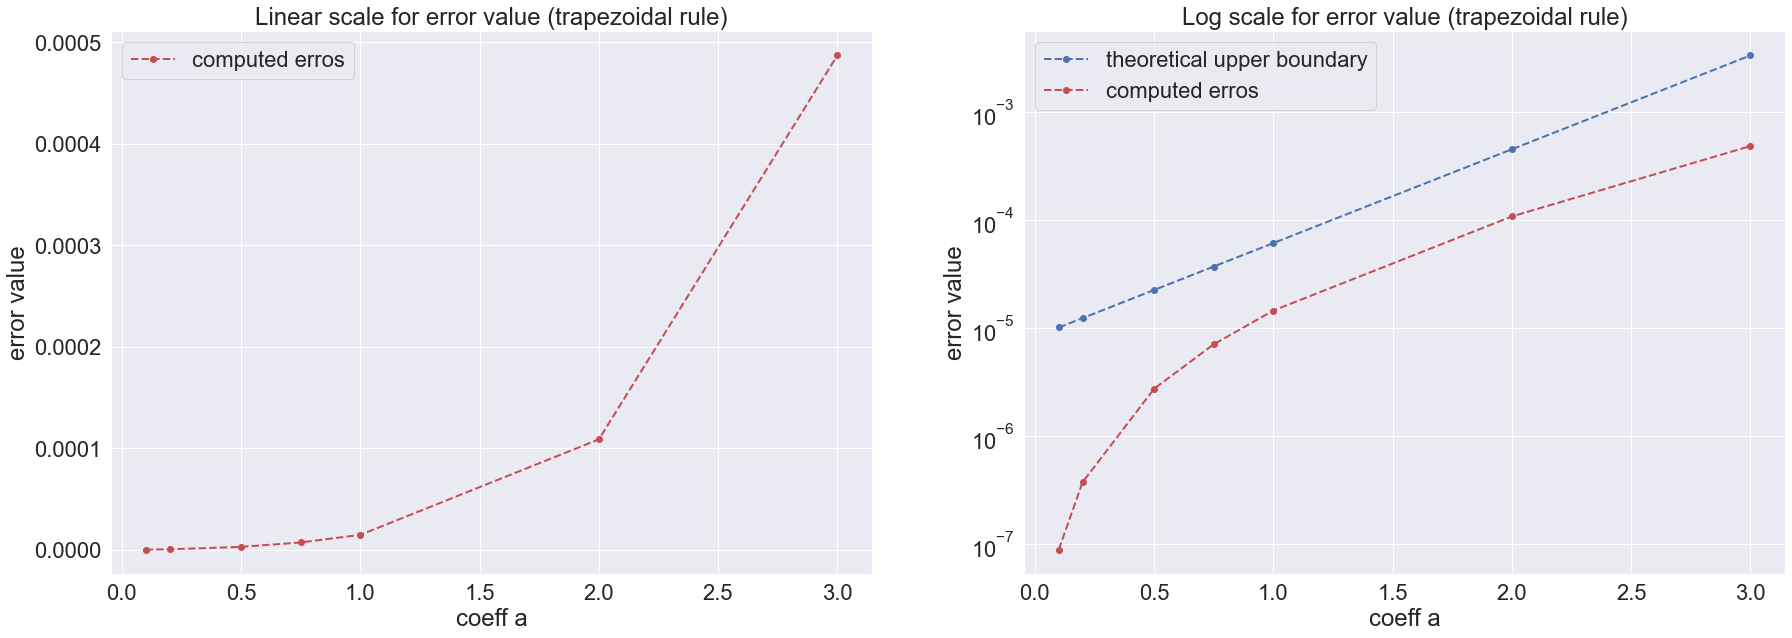

In [11]:
coefs=[0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs, exact, sums, u_bounds =[], [], [], []
_a, _b, n = 0, 1, 100
f=lambda x: np.e**(a*x)

for a in coefs:
    exact=(np.e**a-1)/a
    I=trapezoidal(f, _a, _b, n)
    err=np.abs(exact-I)
    errs.append(err)
    u_bounds.append(u_bound(f, _a, _b, n)[1])

plt.subplots(1, 2, figsize=(30,10))
plt.subplot(1, 2, 1)    
# plt.figure(figsize=(8,8))
plt.title('Linear scale for error value (trapezoidal rule)')
plt.xlabel('coeff a')
plt.ylabel('error value')
plt.plot(coefs, errs, 'ro--', linewidth=2, label='computed erros')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Log scale for error value (trapezoidal rule)')
plt.xlabel('coeff a')
plt.ylabel('error value')
plt.yscale('log')
plt.plot(coefs, u_bounds, 'bo--', linewidth=2, label='theoretical upper boundary' )
plt.plot(coefs, errs, 'ro--', linewidth=2, label='computed erros' )
plt.legend()

### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

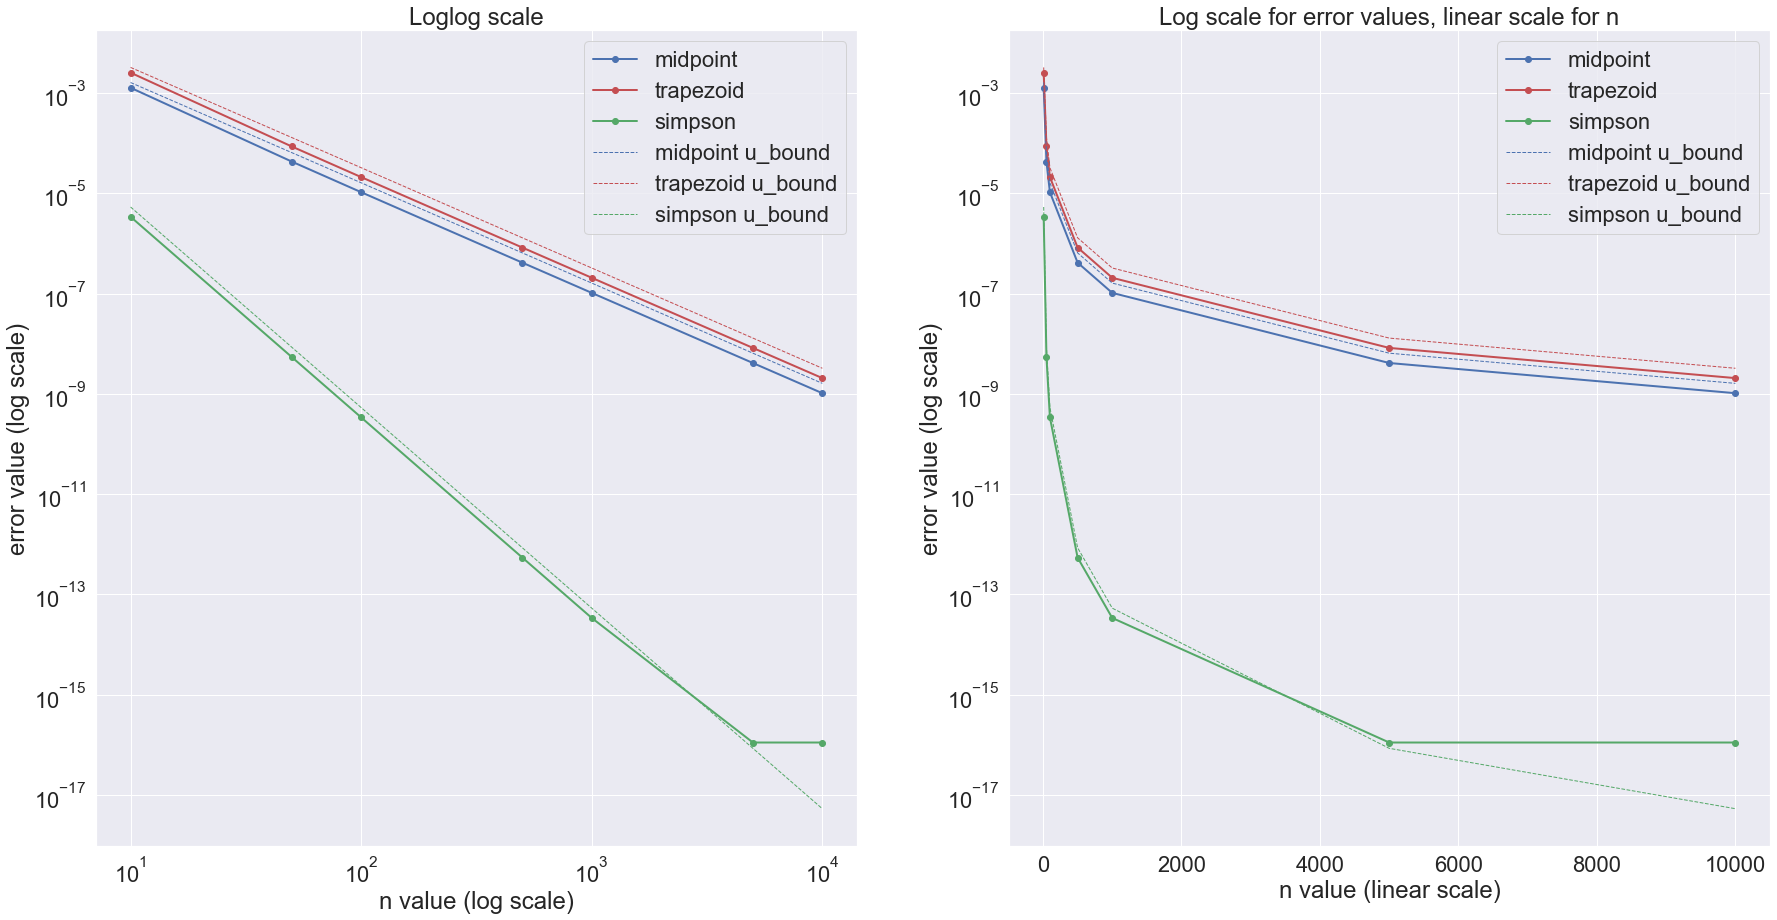

In [12]:
ns=[10, 50, 100, 500, 1000, 5000, 10000] 
errs_mp, errs_mp_ubound=[], []
errs_trap, errs_trap_ubound=[], []
errs_simp, errs_simp_ubound=[], []

a, b = 0, np.pi/2
f=lambda x: np.sin(x)
exact=(-1)*(np.cos(np.pi/2)-np.cos(0)) # 1

for n in ns:
    errs_mp.append(np.abs(exact - middle(f, a, b, n)))
    errs_trap.append(np.abs(exact - trapezoidal(f, a, b, n)))
    errs_simp.append(np.abs(exact - simpson(f, a, b, n+1)))
    err_mp_ubound, err_trap_ubound, err_simp_ubound = u_bound(f, a, b, n)
    errs_mp_ubound.append(err_mp_ubound)
    errs_trap_ubound.append(err_trap_ubound)
    errs_simp_ubound.append(err_simp_ubound)

#your code goes here
#please, use loglog scale!

plt.subplots(1, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
plt.title('Loglog scale')
plt.xlabel('n value (log scale)')
plt.ylabel('error value (log scale)')     
plt.yscale('log')
plt.loglog(ns, errs_mp, 'bo-', label='midpoint', linewidth=2)
plt.plot(ns, errs_trap, 'ro-', label='trapezoid',  linewidth=2)
plt.plot(ns, errs_simp, 'go-', label='simpson',  linewidth=2)
plt.plot(ns, errs_mp_ubound, 'b--', label='midpoint u_bound', linewidth=1)
plt.plot(ns, errs_trap_ubound, 'r--', label='trapezoid u_bound',  linewidth=1)
plt.plot(ns, errs_simp_ubound, 'g--', label='simpson u_bound',  linewidth=1)
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Log scale for error values, linear scale for n')
plt.xlabel('n value (linear scale)')
plt.ylabel('error value (log scale)')     
plt.yscale('log')
plt.plot(ns, errs_mp, 'bo-', label='midpoint', linewidth=2)
plt.plot(ns, errs_trap, 'ro-', label='trapezoid',  linewidth=2)
plt.plot(ns, errs_simp, 'go-', label='simpson',  linewidth=2)
plt.plot(ns, errs_mp_ubound, 'b--', label='midpoint u_bound', linewidth=1)
plt.plot(ns, errs_trap_ubound, 'r--', label='trapezoid u_bound',  linewidth=1)
plt.plot(ns, errs_simp_ubound, 'g--', label='simpson u_bound',  linewidth=1)
plt.legend()


## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

1. The exact_checker function for n=101 shows the following errors for the function $x^x$:
midpoint rule - 0.0007980231737017007, 
trapezois rule - 0.0014178308025147857,
simpson's rule - 0.0010287667022845781.
This lets us conclude that the midpoint rule method gives best results for the function $x^x$.

2. Calculations and plotting for $e^{ax}$ have shown that error estimations by the trapezoidal rule maintain the theoretical upper boundary for the function: computed error values follow the direction of theoretical upper boundary curve and never exceed it.

3. Up to some point all tree methods produce error values below corresponding theoretical upper boundaries. However, as n increases, at approx. 3500, the curve of Simpson’s rule error estimations crosses the curve of theoretical upper boundary of this method and no more follows it even though the theoretical boundary keeps decreasing. 
The reason may be that for really small segments produced by large n values, parabolic approximation of the function on each segment more and more looks like a flat line. If this is true, then - as n keeps increasing, segments keep getting smaller, and parabolic approximation keeps 'flattening' - error estimations of the Simpson’s rule should tend to error estimations of midpoint and trapezoidal rule. As a matter of fact we can observe this error tendency by increasing n up to 50 million. However such increase would require certian computation time,